In [1]:
# 1. Prologue: an atomistic view of electrical resistance

In [2]:
## Exercises

In [3]:
from pylab import *
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34
q=1.602e-19
I0=q*q/hbar;

#Parameters
U0=0.025
kT=0.025
mu=0
ep=0.2
N0=0
g1=0.005
g2=0.005
g=g1+g2
alphag=1
alphad=0.5

#Energy grid
NE=501
E=linspace(-1,1,NE)
dE=E[1]-E[0];
g1=0.005*(E+abs(E))/(E+E+1e-6) #zero for negative E
g2=0.005*ones((NE))
g=g1+g2

#Bias
IV=101
VV=linspace(-0.6,0.6,IV)

#Initializing arrays
I=zeros((IV))
N=zeros((IV))

for iV in range(0,IV):
    Vg=0 #Vd=0
    Vd=VV[iV]  #Vg=VV[iV]
    mu1=mu
    mu2=mu1-Vd
    UL=-(alphag*Vg)-(alphad*Vd);
    U=0 # Self-consistent field
    dU=1
    
    while dU>1e-6:
        f1=1/(1+exp((E-mu1)/kT))
        f2=1/(1+exp((E-mu2)/kT))
        D=(g/(2*pi))/(((E-ep-UL-U)**2)+((g/2)**2))
        D=D/(dE*sum(D))
        N[iV]=dE*2*sum(D*((f1*g1/g)+(f2*g2/g)))
        Unew=U0*(N[iV]-N0); dU=abs(U-Unew)
        U=U+0.1*(Unew-U)
        
    I[iV]=dE*2*I0*(sum(D*(f1-f2)*g1*g2/g))

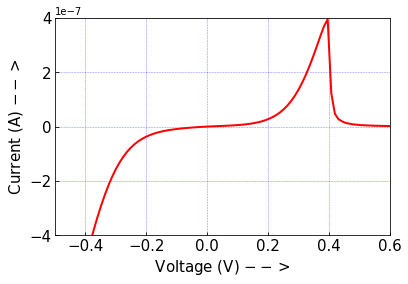

In [4]:
plot(VV,I,'r',lw=2)
xlabel(' Voltage (V) $-->$ ',fontsize=15)
ylabel(' Current (A) $-->$ ',fontsize=15)
xlim(-0.5,0.6)
ylim(-4e-7,4e-7)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--',lw=0.5)